Car Crashes Involving Bikes

Bikes are a common and effective form of alternative transportation. Being eco-friendly and much quicker than walking, it is a great option for travelling short or medium distances. I gathered car crash data in pittsburgh to find out which areas had the most crashes involving bikes. A larger crash crash count could indicate less ideal conditions for biking. Roads that reserve a large portion for bikes or have protected bike lanes will likely reduce the bike crashes in that area.

Dataset:https://data.wprdc.org/dataset/allegheny-county-crash-data
The data used has been collected from 2004-2020

In [9]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

# read .csv file
data = pd.read_csv("raw-data.csv", low_memory=False)

# narrows data to just crashes involving bikes within pittsburgh
bike_data = data.loc[data['BICYCLE_COUNT'] > 0]
bike_data = bike_data[['BICYCLE_COUNT', 'DEC_LONG', 'DEC_LAT', 'BICYCLE_MAJ_INJ_COUNT', 'BICYCLE_DEATH_COUNT']]
bike_data = bike_data[(bike_data.DEC_LONG >-80.1) & (bike_data.DEC_LONG < -79.85)]
bike_data = bike_data[(bike_data.DEC_LAT >40.36) & (bike_data.DEC_LAT < 40.5)]

# get death data
death_data = bike_data.loc[data['BICYCLE_DEATH_COUNT'] > 0]

# get major injury data
injury_data = bike_data.loc[data['BICYCLE_MAJ_INJ_COUNT'] > 0]

# display sample of data from the three sets
print("Sample of bike crash data")
print(bike_data.head(3))
print()
print()
print("Sample of bike crash injury data")
print(injury_data.head(3))
print()
print()
print("Sample of bike crash death data")
print(death_data.head(3))

Sample of bike crash data
     BICYCLE_COUNT  DEC_LONG  DEC_LAT  BICYCLE_MAJ_INJ_COUNT  \
662              1  -79.9062  40.3856                      0   
925              1  -80.0246  40.4087                      0   
961              1  -79.9030  40.4091                      1   

     BICYCLE_DEATH_COUNT  
662                    0  
925                    0  
961                    0  


Sample of bike crash death data
       BICYCLE_COUNT  DEC_LONG  DEC_LAT  BICYCLE_MAJ_INJ_COUNT  \
961                1  -79.9030  40.4091                      1   
5666               1  -80.0203  40.3687                      1   
12526              1  -79.9696  40.4760                      1   

       BICYCLE_DEATH_COUNT  
961                      0  
5666                     0  
12526                    0  


Sample of bike crash injury data
       BICYCLE_COUNT   DEC_LONG    DEC_LAT  BICYCLE_MAJ_INJ_COUNT  \
1123               1 -79.948100  40.418700                      0   
30369              1 

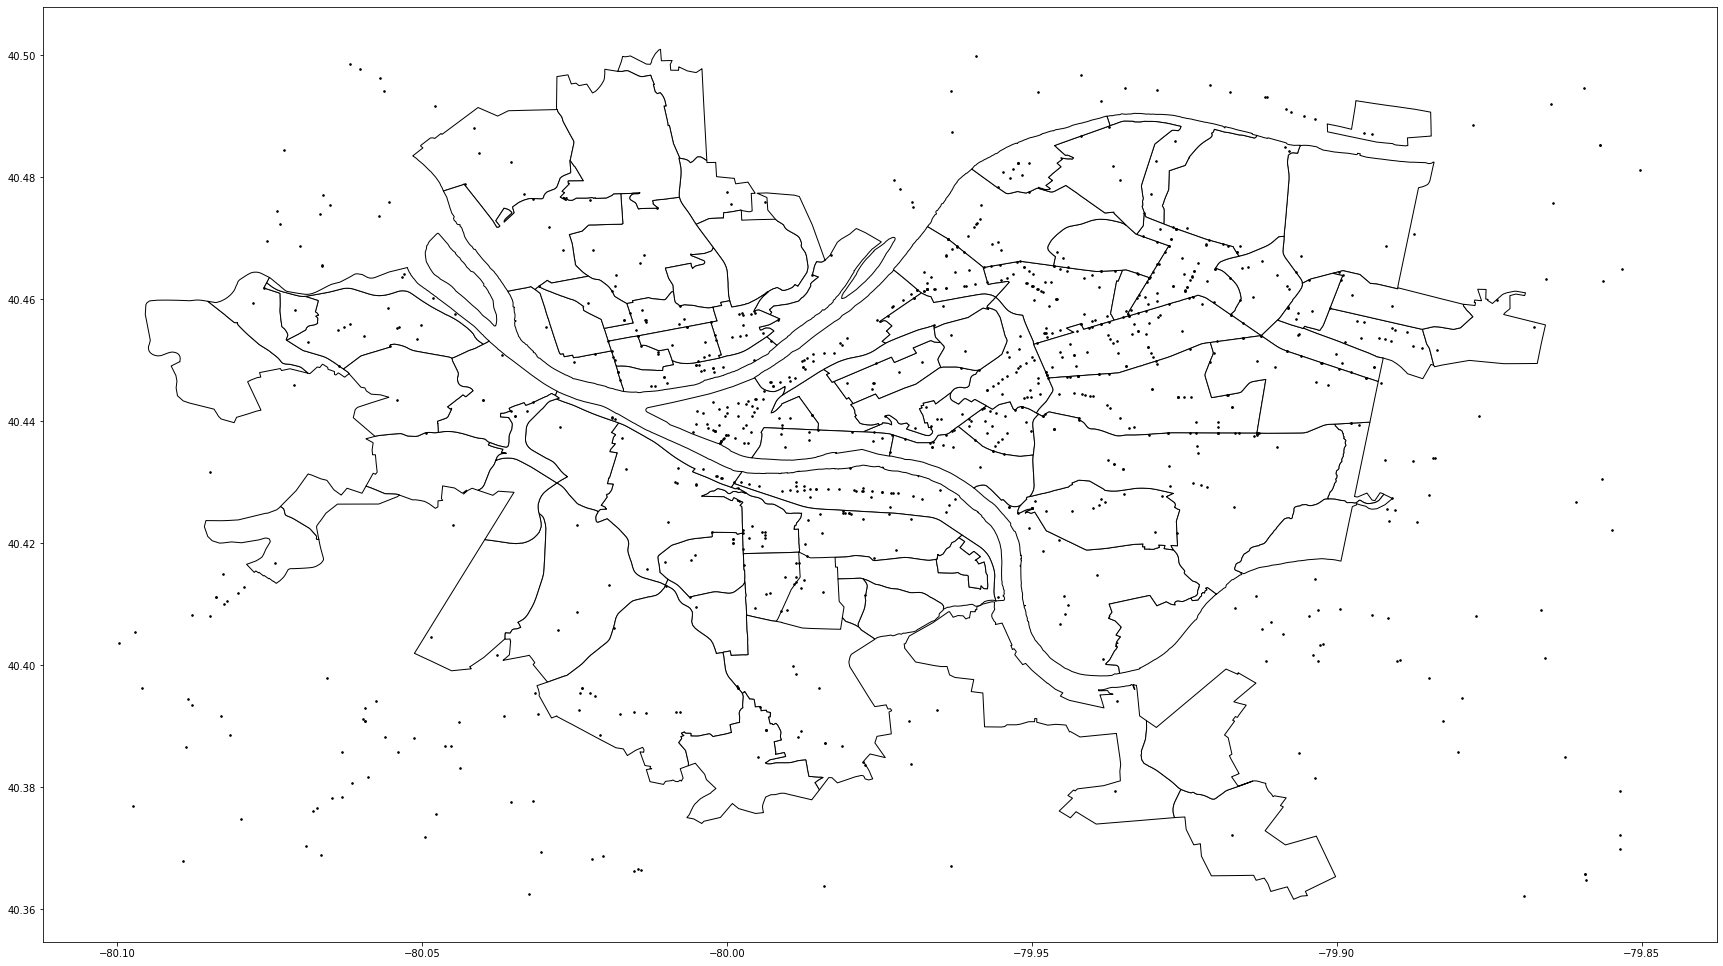

In [2]:
# load pittsburgh map
neighborhoods = gpd.read_file("neighborhoods.geojson")
fig,ax = plt.subplots(figsize = (30,30))
neighborhoods.plot(ax = ax, color='white', edgecolor='black')

# plot points
geometry = [Point(xy) for xy in zip(bike_data.DEC_LONG,bike_data.DEC_LAT)]
point_gdf = gpd.GeoDataFrame(geometry = geometry)
points_map = point_gdf.plot(ax = ax, markersize = 10, color = 'black', marker = '.')
plt.show()

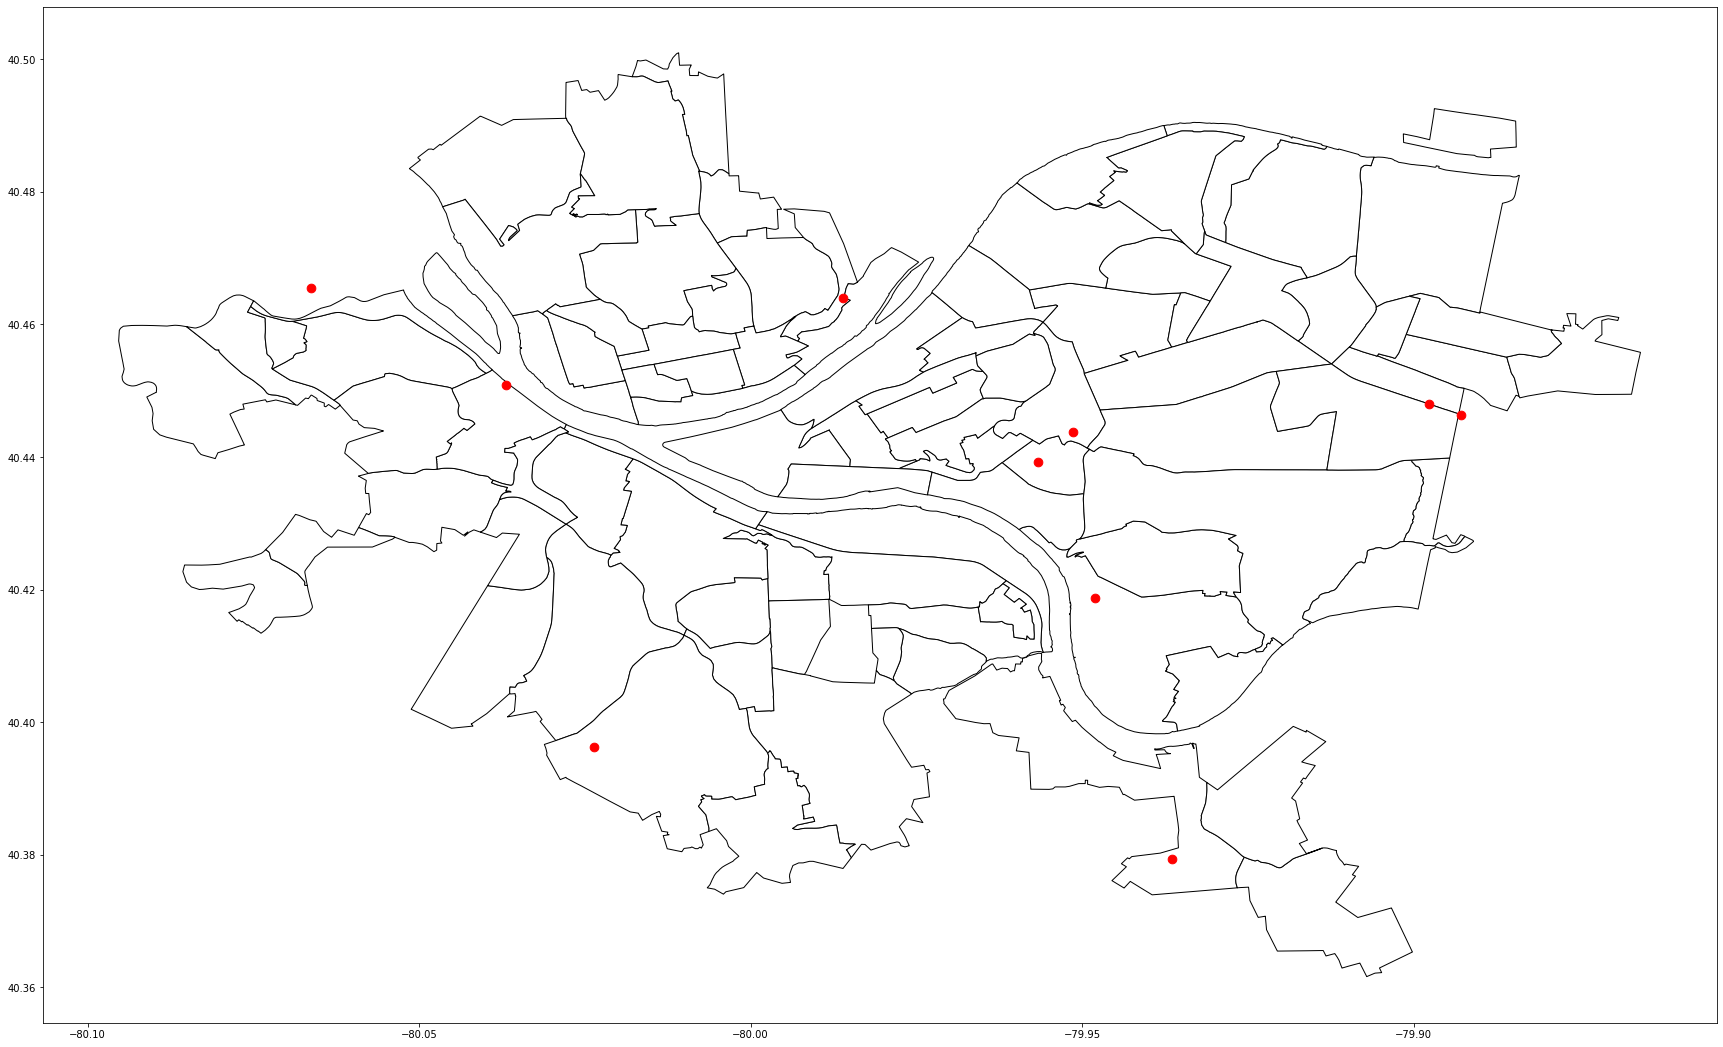

In [18]:
# load pittsburgh map
neighborhoods = gpd.read_file("neighborhoods.geojson")
fig,ax = plt.subplots(figsize = (30,30))
neighborhoods.plot(ax = ax, color='white', edgecolor='black')

# plot points
geometry = [Point(xy) for xy in zip(death_data.DEC_LONG,death_data.DEC_LAT)]
point_gdf = gpd.GeoDataFrame(geometry = geometry)
points_map = point_gdf.plot(ax = ax, markersize = 300, color = 'red', marker = '.')
plt.show()

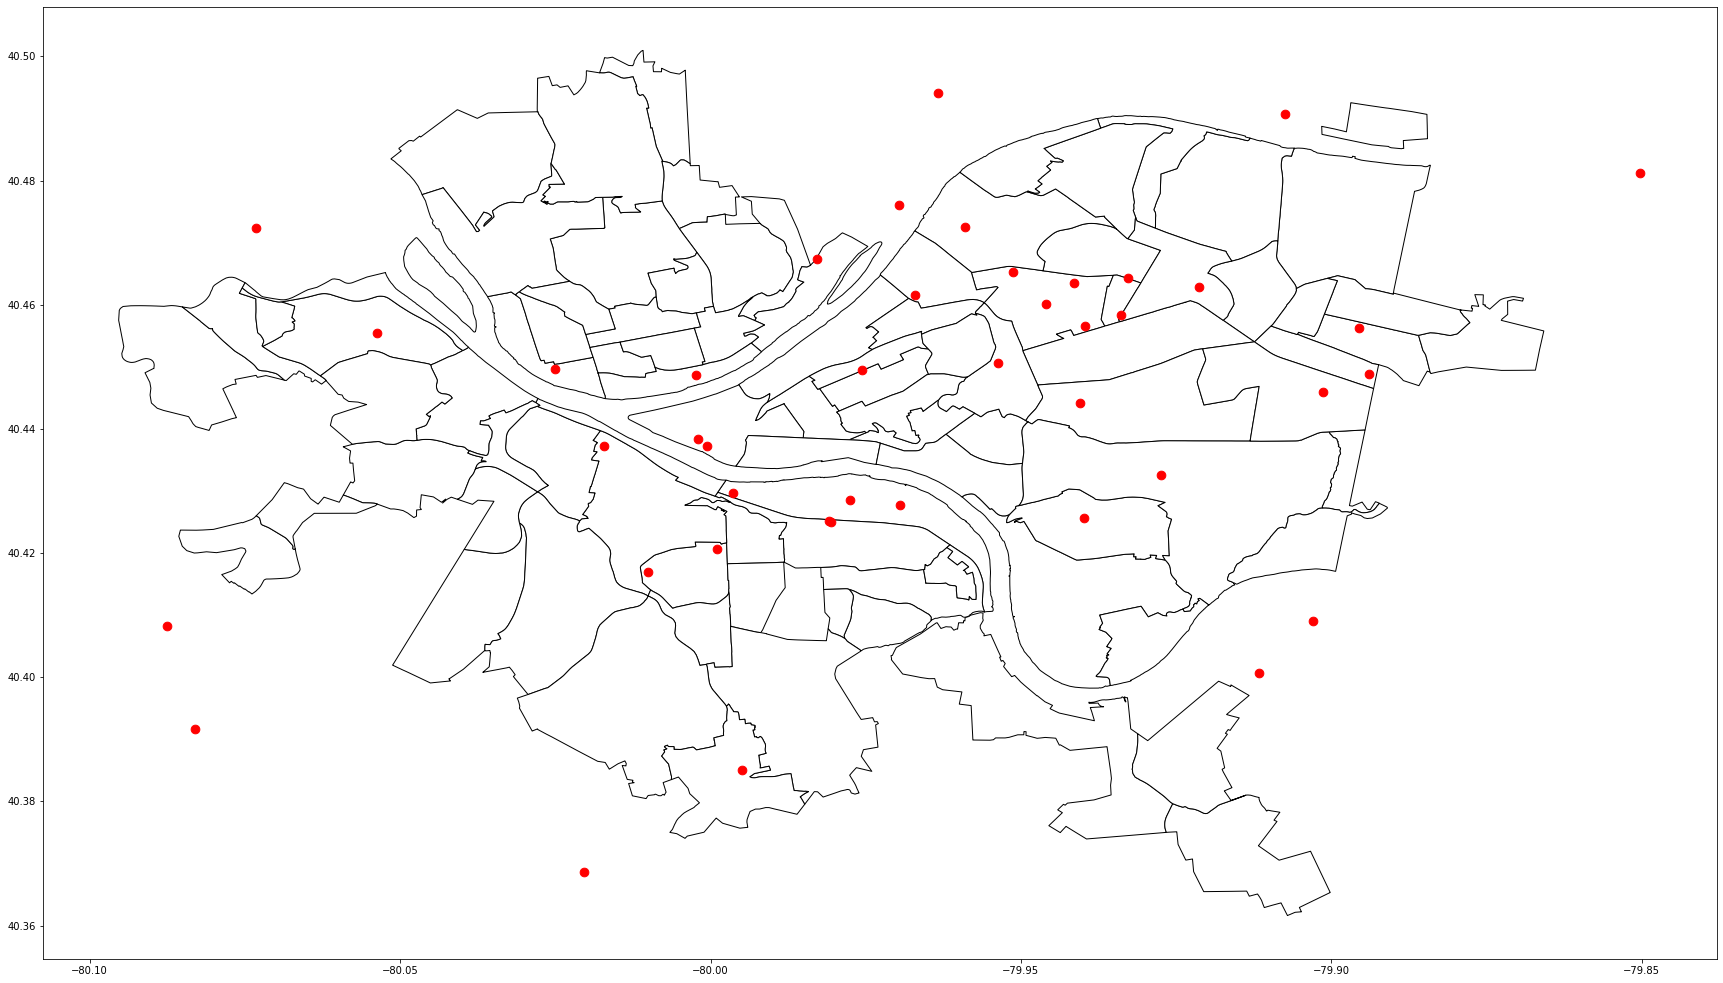

In [19]:
# load pittsburgh map
neighborhoods = gpd.read_file("neighborhoods.geojson")
fig,ax = plt.subplots(figsize = (30,30))
neighborhoods.plot(ax = ax, color='white', edgecolor='black')

# plot points
geometry = [Point(xy) for xy in zip(injury_data.DEC_LONG,injury_data.DEC_LAT)]
point_gdf = gpd.GeoDataFrame(geometry = geometry)
points_map = point_gdf.plot(ax = ax, markersize = 300, color = 'red', marker = '.')
plt.show()

Of course there are limitations to using this data set. Areas that have more people biking are going to have more crashes, and I do not have the data to account for that factor.

Neighborhoods with no reported bike crashes:

Summer Hill

New Homestead

Ridgemont

Oakwood

Fairywood

Mt Oliver

Neighborhoods with high concentrations of reported bike crashes:

North Oakland

Bloomfield

Southside Flats

East Liberty

Shady Side

The most was Central Business District with 43 crashes

Bloomfield had the most major injuries + deaths with 4 reported